In [25]:
# Importando as Bibliotecas
import pandas as pd
import math
from pandas_datareader import data, wb
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import mplfinance as mpf
import yfinance as yf
sns.set_style('white')
sns.despine(top=True, right=True)

<Figure size 640x480 with 0 Axes>

In [26]:
# Definir período de tempo
inicio = datetime.datetime(2020, 1, 1)
fim = datetime.datetime(2024, 7, 1)

# Definir tickers dos índices e criptomoedas
tickers = {
    'Brasil': '^BVSP',
    'EUA': '^GSPC',
    'Europa': '^STOXX50E',
    'Japão': '^N225',
    'China': '000001.SS',
    'Cripto': 'BTC-USD'
}

# Obter dados
dados = {nome: yf.download(ticker, start=inicio, end=fim) for nome, ticker in tickers.items()}

# Concatenar dados
ativos = pd.concat(dados.values(), axis=1, keys=dados.keys())

# Renomear colunas
ativos.columns.names = ['Mercado', 'Atributo']

# Exibir dados
print(ativos.head())

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Mercado       Brasil                                                     \
Atributo        Open      High       Low     Close Adj Close     Volume   
Date                                                                      
2020-01-01       NaN       NaN       NaN       NaN       NaN        NaN   
2020-01-02  115652.0  118573.0  115649.0  118573.0  118573.0  5162700.0   
2020-01-03  118564.0  118792.0  117341.0  117707.0  117707.0  6834500.0   
2020-01-04       NaN       NaN       NaN       NaN       NaN        NaN   
2020-01-05       NaN       NaN       NaN       NaN       NaN        NaN   

Mercado             EUA                                         ...  \
Atributo           Open         High          Low        Close  ...   
Date                                                            ...   
2020-01-01          NaN          NaN          NaN          NaN  ...   
2020-01-02  3244.669922  3258.139893  3235.530029  3257.850098  ...   
2020-01-03  3226.360107  3246.149902  3222.3

In [52]:
# Limpando os NaNs
ativos = ativos.dropna()

In [55]:
# Exibir dados
ativos.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 943 entries, 2020-01-06 to 2024-06-28
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   (Brasil, Open)       943 non-null    float64
 1   (Brasil, High)       943 non-null    float64
 2   (Brasil, Low)        943 non-null    float64
 3   (Brasil, Close)      943 non-null    float64
 4   (Brasil, Adj Close)  943 non-null    float64
 5   (Brasil, Volume)     943 non-null    float64
 6   (EUA, Open)          943 non-null    float64
 7   (EUA, High)          943 non-null    float64
 8   (EUA, Low)           943 non-null    float64
 9   (EUA, Close)         943 non-null    float64
 10  (EUA, Adj Close)     943 non-null    float64
 11  (EUA, Volume)        943 non-null    float64
 12  (Europa, Open)       943 non-null    float64
 13  (Europa, High)       943 non-null    float64
 14  (Europa, Low)        943 non-null    float64
 15  (Europa, Close)      

## 1. Análise dos preços de cada ativo financeiro


---


Os preços numa economia de mercado estão sempre num movimento de sobe e desce, obedecendo a lei da oferta e demanda. No mercado financeiro isso não é diferente, o preço dos ativos estão sempre subindo e descendo, obedecendo a lei fundamental do mercado.

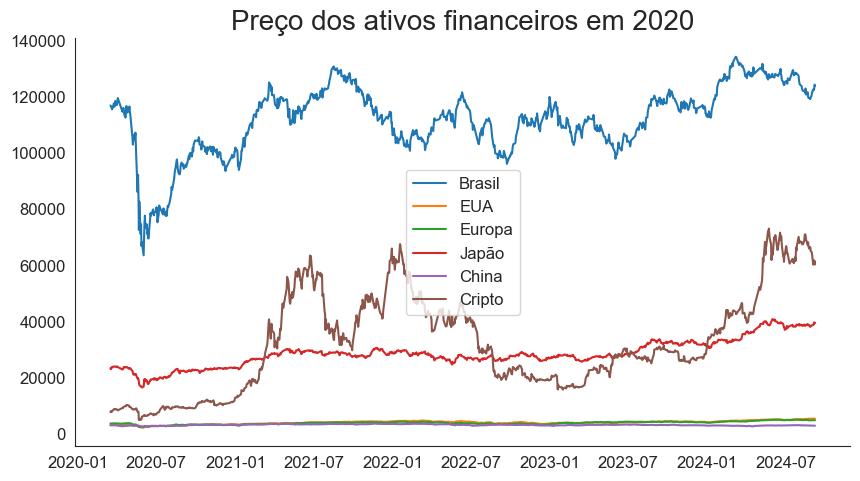

In [56]:
# Plotar os preços de fechamento
for i in tickers:
  ativos[i]['Close'].plot(figsize=(10,6),legend=True, label=i)
  plt.title('Preço dos ativos financeiros em 2020', fontsize=20)
  sns.despine()
  plt.xlabel('')
  plt.xticks(rotation=360)
  sns.set_style('white')

In [62]:
# Imprimir os preços de fechamento mínimo, máximo, médio.
print('Preços de fechamento mínimos:')
print(ativos.xs(key='Close', axis=1, level='Atributo').min())
print('\nPreços de fechamento máximos:')
print(ativos.xs(key='Close', axis=1, level='Atributo').max())
print('\nPreços de fechamento médios:')
print(ativos.xs(key='Close', axis=1, level='Atributo').mean())


Preços de fechamento mínimos:
Mercado
Brasil    63570.000000
EUA        2237.399902
Europa     2385.820068
Japão     16552.830078
China      2660.169922
Cripto     4970.788086
dtype: float64

Preços de fechamento máximos:
Mercado
Brasil    134194.000000
EUA         5487.029785
Europa      5100.899902
Japão      40888.429688
China       3715.370117
Cripto     73083.500000
dtype: float64

Preços de fechamento médios:
Mercado
Brasil    111659.906681
EUA         4096.918444
Europa      3944.420775
Japão      28556.113200
China       3240.611588
Cripto     32317.871969
dtype: float64


In [63]:
# volatilidade
volatilidade = pd.DataFrame()
for tick in tickers:
    volatilidade[tick + '(volatilidade)'] = ativos[tick]['Close'].pct_change(fill_method=None)
volatilidade.head()

,Brasil(volatilidade),EUA(volatilidade),Europa(volatilidade),Japão(volatilidade),China(volatilidade),Cripto(volatilidade)
Date,,,,,,
2020-01-06,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-07,-0.001848,-0.002803,0.001793,0.015982,0.006938,0.050774
2020-01-08,-0.003557,0.004902,0.003541,-0.015735,-0.012210,-0.010269
2020-01-09,-0.002581,0.006655,0.006181,0.023060,0.009126,-0.024851
2020-01-10,-0.003829,-0.002855,-0.001675,0.004663,-0.000837,0.036487


In [64]:
#limpando os NaNs
volatilidade = volatilidade.dropna()

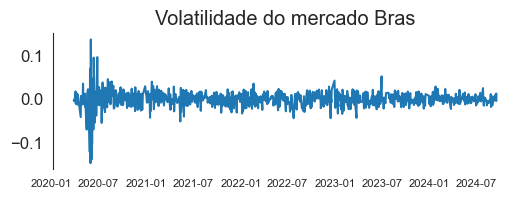

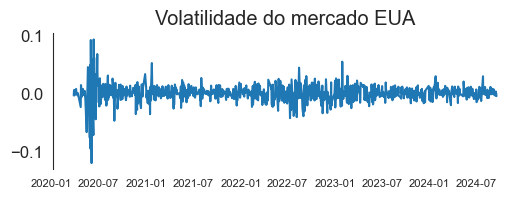

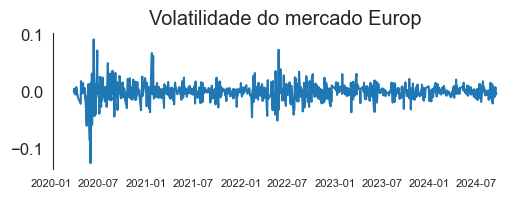

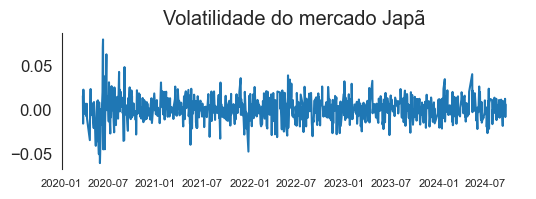

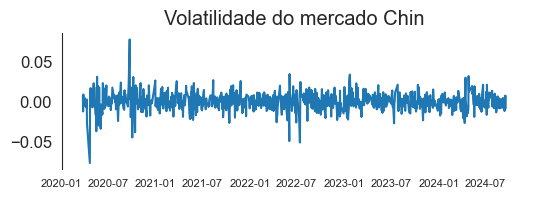

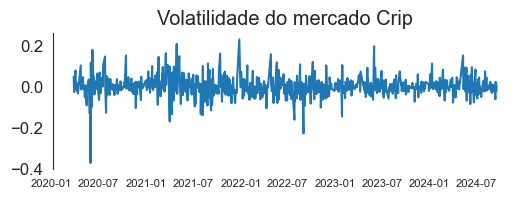

In [67]:
# plotar a volatilidade
for i in volatilidade.columns:
  plt.figure()
  volatilidade[i].plot(figsize=(6,2))
  plt.title(f'Volatilidade do mercado {str(i).strip("(volatilidade)")}')
  sns.despine(bottom=True)
  plt.xticks(fontsize=8, rotation=360)
  plt.xlabel('')

In [68]:
# Imprimir os dias de baixa e alta volatilidade
print('Dias de baixa volatilidade:')
print((volatilidade < 0.01).sum())
print('\nDias de alta volatilidade:')
print((volatilidade > 0.03).sum())


Dias de baixa volatilidade:
Brasil(volatilidade)    719
EUA(volatilidade)       755
Europa(volatilidade)    794
Japão(volatilidade)     746
China(volatilidade)     807
Cripto(volatilidade)    586
dtype: int64

Dias de alta volatilidade:
Brasil(volatilidade)     22
EUA(volatilidade)        19
Europa(volatilidade)     20
Japão(volatilidade)      16
China(volatilidade)       7
Cripto(volatilidade)    174
dtype: int64


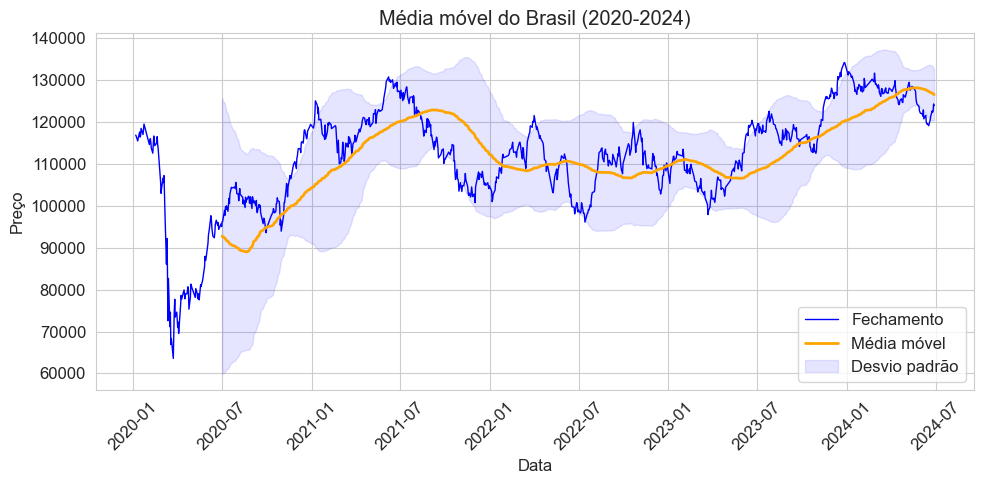

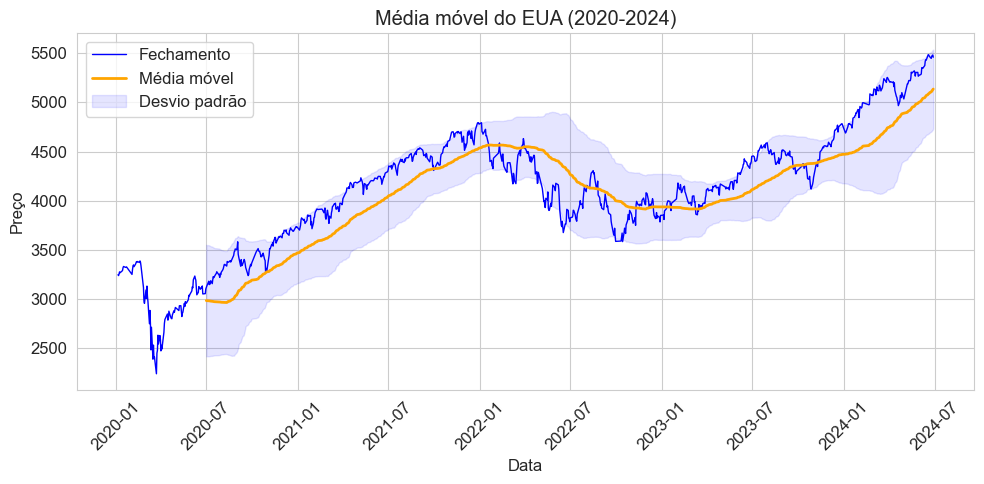

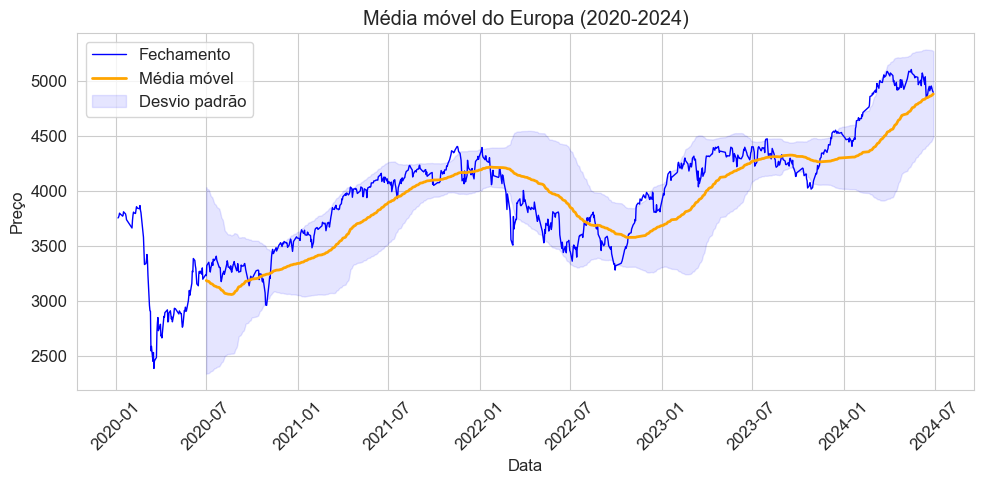

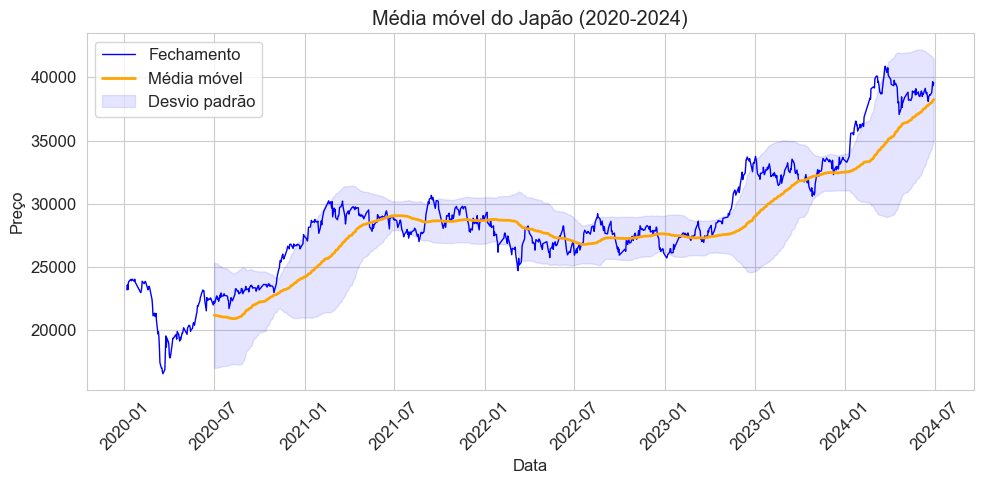

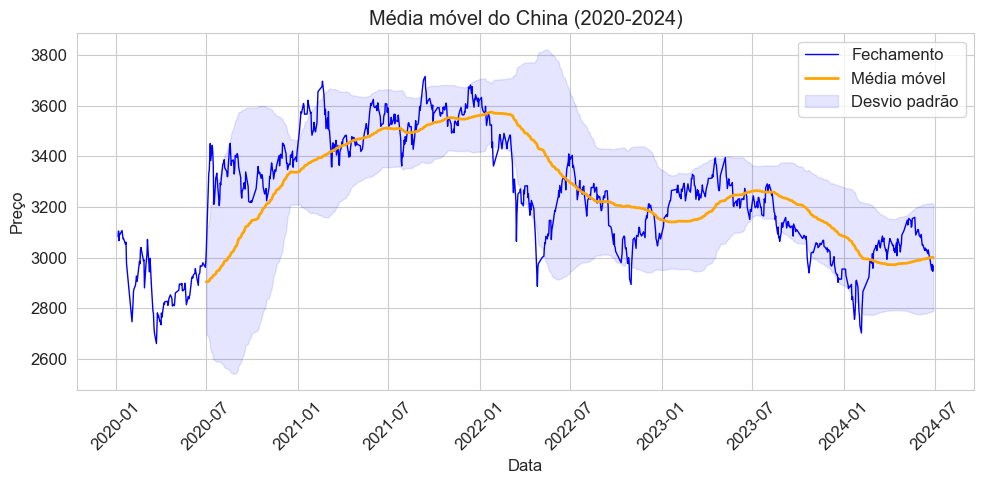

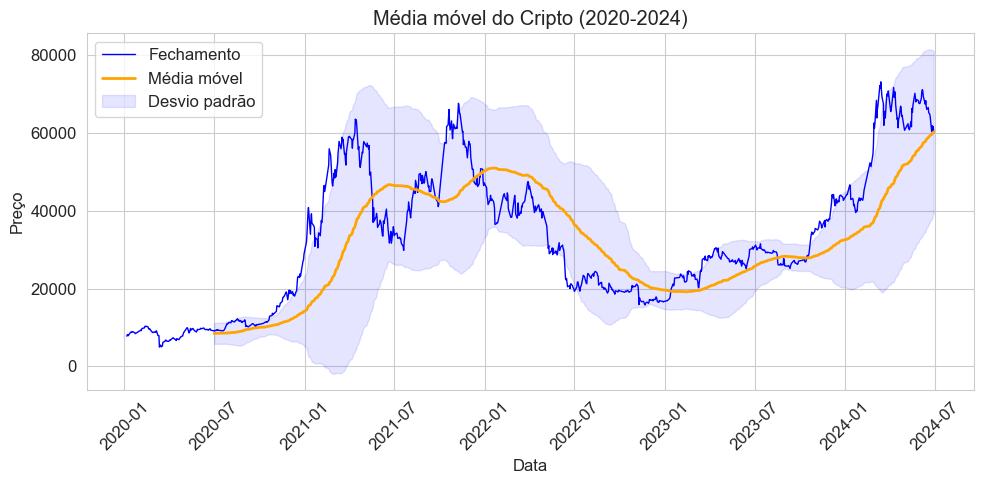

In [69]:
# Configurar estilo do seaborn
sns.set_style("whitegrid")
plt.rcParams.update({'font.size': 12})

# Função para filtrar dados por intervalo de anos e coluna
def filtrar_dados_por_intervalo(df, coluna, inicio, fim):
    return df[coluna][(df.index.year >= inicio) & (df.index.year <= fim)]

for mercado in ativos.columns.levels[0]:
    # Filtrar dados de 2020 até 2024
    fechamento = filtrar_dados_por_intervalo(ativos[mercado], 'Close', 2020, 2024)
    
    # Preencher valores ausentes (NaN) com a interpolação ou com o último valor conhecido
    fechamento = fechamento.interpolate(method='linear').ffill().bfill()
    
    # Calcular média móvel e desvio padrão
    media_movel = fechamento.rolling(window=100).mean()
    desvio_padrao = fechamento.rolling(window=100).std()

    # Plotar dados
    plt.figure(figsize=(10, 5))

    # Plotar o fechamento dos preços
    plt.plot(fechamento.index, fechamento, label='Fechamento', color='blue', linewidth=1)

    # Plotar a média móvel
    plt.plot(media_movel.index, media_movel, label='Média móvel', color='orange', linewidth=2)

    # Plotar a área de desvio padrão (a "nuvem")
    plt.fill_between(fechamento.index, 
                     media_movel - 2 * desvio_padrao, 
                     media_movel + 2 * desvio_padrao, 
                     color='blue', alpha=0.1, label='Desvio padrão')

    # Configurações de legenda, título e eixos
    plt.legend(loc='best')
    plt.title(f'Média móvel do {mercado} (2020-2024)')
    plt.xticks(rotation=45)
    plt.xlabel('Data')
    plt.ylabel('Preço')

    # Mostrar gráfico
    plt.tight_layout()
    plt.show()

As oscilações maiores (em laranja) nos mostram os ciclos que se passaram no mercado durante esse ano, sendo no período de março a maior queda. De fato, a doença, o isolamento social (que foi necessário para conter o avanço da pandemia), as incertezas sobre o ano, as notícias sobre mortes e casos avançando cada vez mais, e todo o caos influenciaram as expectativas no mercado financeiro.
Podemos observar aqui, que a Magazine Luiza conseguiu decolar em meio a uma crise mundial. Quando analisarmos as correlações, ela terá correlação muito baixa/negativa com os demais ativos.

### Correlação entre a volatilidade

In [46]:
volatilidade.corr()

,Brasil(volatilidade),EUA(volatilidade),Europa(volatilidade),Japão(volatilidade),China(volatilidade),Cripto(volatilidade)
Brasil(volatilidade),1.000000,0.610162,0.455184,0.140000,0.102453,0.317098
EUA(volatilidade),0.610162,1.000000,0.595127,0.174802,0.104598,0.402656
Europa(volatilidade),0.455184,0.595127,1.000000,0.329766,0.176038,0.327494
Japão(volatilidade),0.140000,0.174802,0.329766,1.000000,0.330589,0.016711
China(volatilidade),0.102453,0.104598,0.176038,0.330589,1.000000,0.042686
Cripto(volatilidade),0.317098,0.402656,0.327494,0.016711,0.042686,1.000000


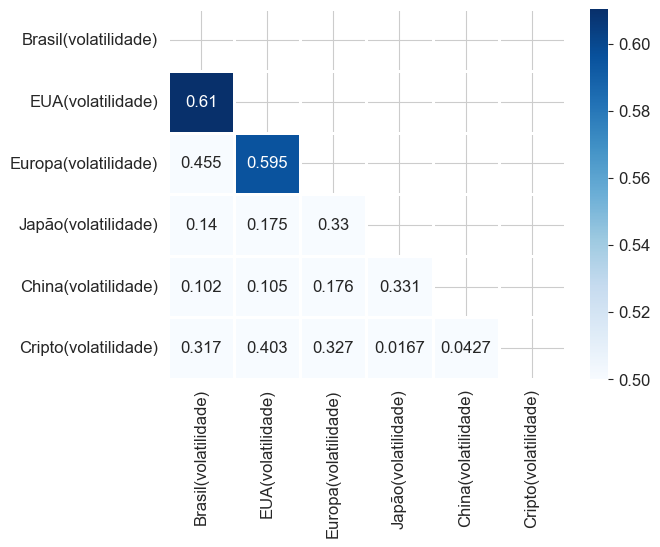

In [47]:
mask = np.zeros_like(volatilidade.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(volatilidade.corr(), annot=True, cmap='Blues', vmin=0.5, linewidths=1, fmt='.3g', mask=mask);

Com um gráfico de dispersão podemos observar as mesmas informações de maneira diferente, nos dando mais uma percepção sobre a mesma informação.

Uma maneira simples e eficiente de fazer isso é usando o pairplot do seaborn.

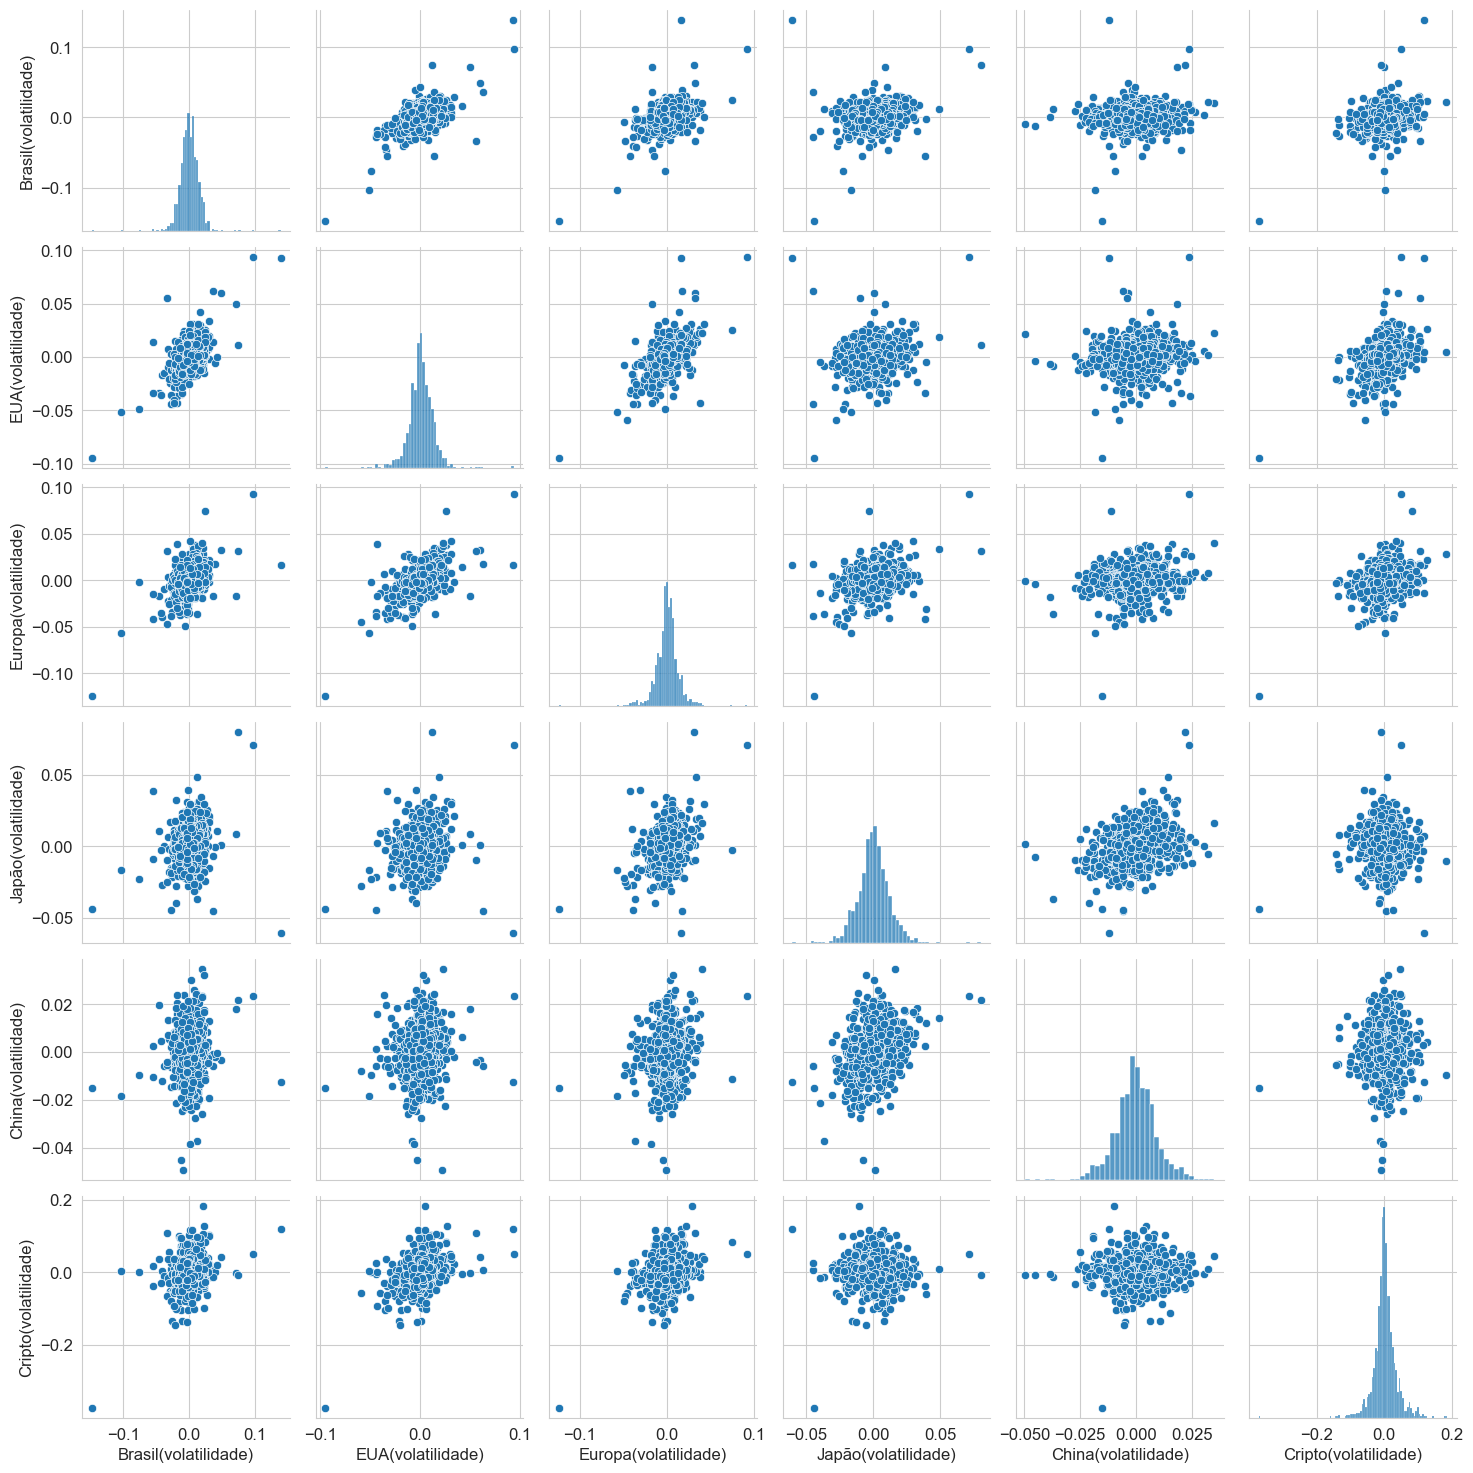

In [48]:
sns.pairplot(volatilidade);

## Correlações

---
O quão correlacionadas estão essas volatilidades? Elas se acompanham? Positivamente ou negativamente?

Os ativos no mercado costumam se comportar de maneira similar em casos de crise ou de boom. Isso porque a economia vai perdendo ou ganhando como um todo, o que por sua vez reflete o resultado no mercado financeiro.

**Um guia para interpretar correlações:**

Utilizaremos a [correlação de Pearson](https://pt.wikipedia.org/wiki/Coeficiente_de_correla%C3%A7%C3%A3o_de_Pearson) nessa análise, ela se encaixa melhor com o objetivo do projeto.
* 1.0 positivo ou negativo indica uma correlação perfeita
* 0.9 positivo ou negativo indica uma correlação muito forte.
* 0.7 a 0.9 positivo ou negativo indica uma correlação forte.
* 0.5 a 0.7 positivo ou negativo indica uma correlação moderada.
* 0.3 a 0.5 positivo ou negativo indica uma correlação fraca.
* 0.1 a 0.3 positivo ou negativo indica uma correlação desprezível.
* 0 indica uma correlação inexistente


### Correlação entre os preços

In [49]:
preço_ativos = pd.DataFrame()
for i in tickers:
  preço_ativos[i + '(preço)'] = ativos[i]['Close']
preço_ativos.corr()

,Brasil(preço),EUA(preço),Europa(preço),Japão(preço),China(preço),Cripto(preço)
Brasil(preço),1.000000,0.748291,0.743550,0.768549,0.159999,0.610688
EUA(preço),0.748291,1.000000,0.926314,0.909361,0.176926,0.840165
Europa(preço),0.743550,0.926314,1.000000,0.906169,0.070077,0.752874
Japão(preço),0.768549,0.909361,0.906169,1.000000,-0.031466,0.759983
China(preço),0.159999,0.176926,0.070077,-0.031466,1.000000,0.293995
Cripto(preço),0.610688,0.840165,0.752874,0.759983,0.293995,1.000000


<Axes: >

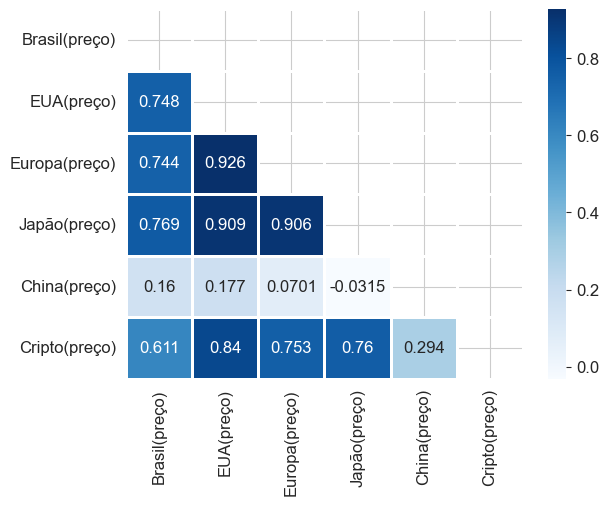

In [50]:
mask = np.zeros_like(preço_ativos.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(preço_ativos.corr(), annot=True, cmap='Blues', fmt='.3g', linewidths=1, mask = mask)

Podemos observar aqui, uma correlação **muito alta entre:**

BANCO DO BRASIL e COGNA EDUCAÇÃO (0.932)

BANCO DO BRASIL e GOL (0.945)

PETROBRÁS e GOL (0.942);

**Alta entre:**

BANCO DO BRASIL e PETROBRÁS (0.887)

BANCO DO BRASIL e JBS (0.777)

PETROBRÁS e COGNA EDUCAÇÃO (0.82)

PETROBRÁS e JBS (0.792)

GOL e JBS (0.814)

GOL e COGNA EDUCAÇÃO (0.867)

JBS e COGNA EDUCAÇÃO (0.762)

**Desprezível/inexistente entre:**

MAGAZINE LUIZA e BANCO DO BRASIL (-0,193)

MAGAZINE LUIZA e PETROBRÁS (0,154)

MAGAZINE LUIZA e JBS (0,028)

MAGAZINE LUIZA e GOL (-0,174)

MAGAZINE LUIZA e COGNA EDUCAÇÃO (-0,268)

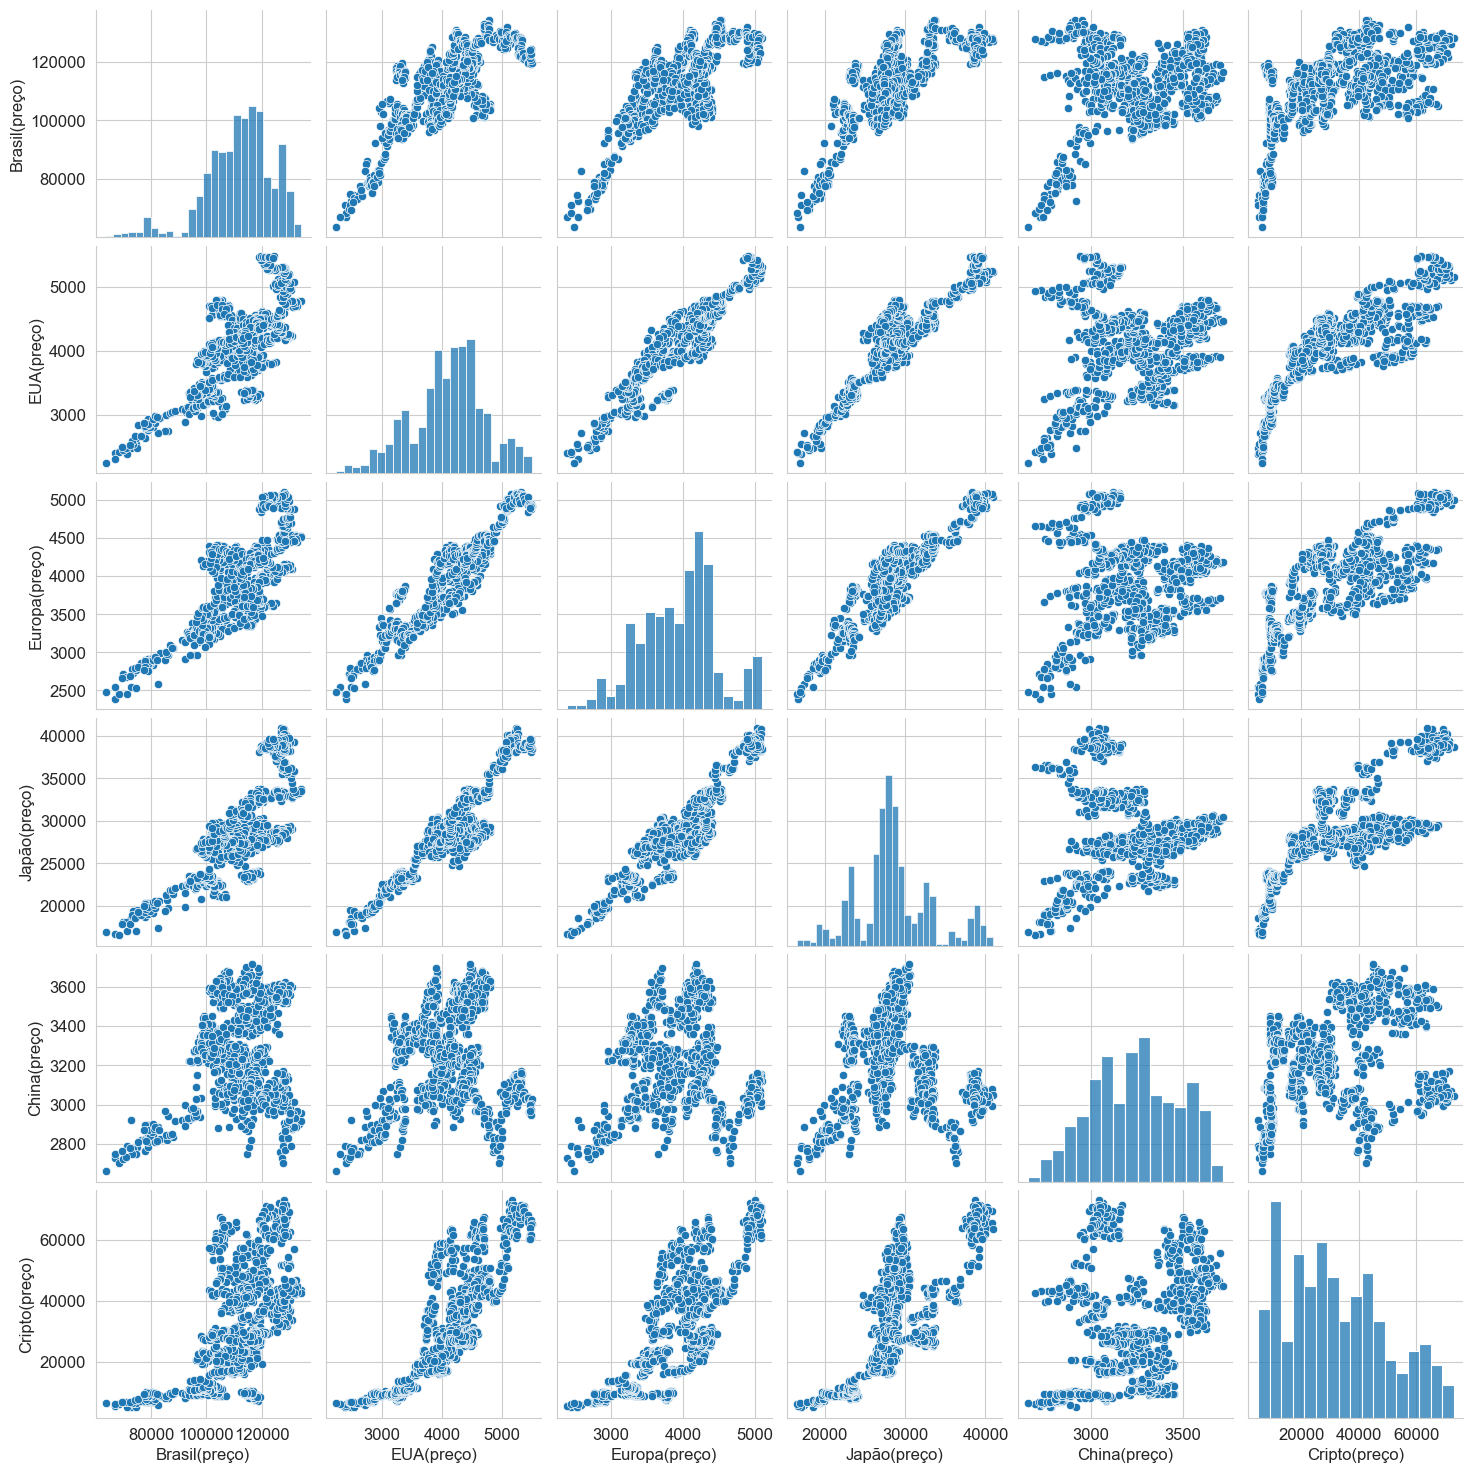

In [51]:
sns.pairplot(preço_ativos)